Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Zhongzhi Zhang"
COLLABORATORS = ""

---

# Activity: Linearity

In this activity, we will explore linearity of transformations on vectors.
In this vein, we'll examine transformations on a peanut-shaped cluster of points.

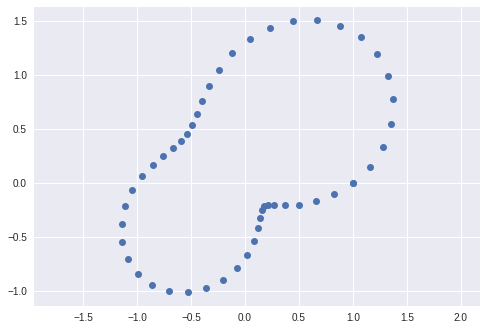

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

theta = np.linspace(0, 2*np.pi)
r = 1 + .3*np.sin(theta) + .5*np.sin(2*theta)
x = r * np.cos(theta)
y = r * np.sin(theta)
plt.plot(x, y, 'o')
plt.axis('equal');

In [3]:
# Group all these points into a 2xn matrix
X = np.array([x, y])
X.shape

(2, 50)

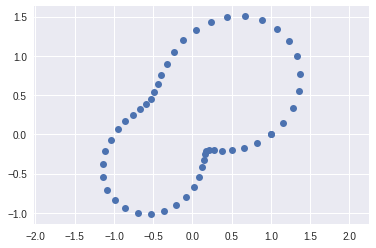

In [4]:
plt.plot(X[0], X[1], 'o')
plt.axis('equal');

# Inner products

Consider the operation $f(x) = v (v^T x)$ for some vector v.
In NumPy, we use the notationa `v[:,None]` to ensure that `v` is treated as a column vector in this product.

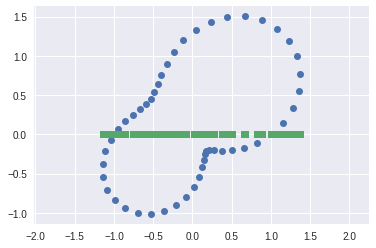

In [5]:
def tplot(X, Y):
    plt.plot(X[0], X[1], 'o')
    plt.plot(Y[0], Y[1], 's')
    plt.axis('equal');

v = np.array([1, 0])
tplot(X, v[:,None] * (v.T @ X))

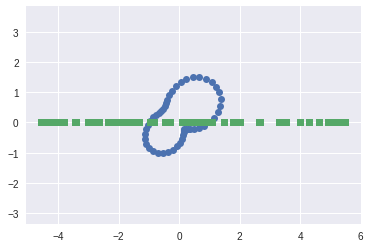

In [6]:
v = np.array([2, 0])
tplot(X, v[:,None] * (v.T @ X))

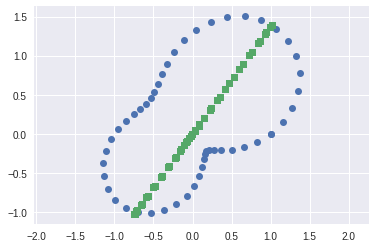

In [7]:
# Vector transformations are "nice" if norm(v) = 1
theta = np.pi * .3
v = np.array([np.cos(theta), np.sin(theta)])
tplot(X, v[:,None] * (v.T @ X))

Compare to the operation $I - v v^T$.

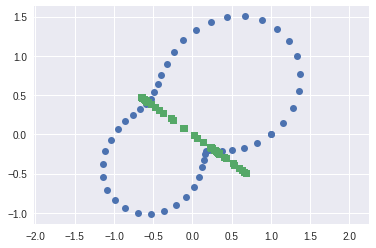

In [8]:
tplot(X, X - v[:,None] * (v.T @ X))

## Givens Rotation

We can rotate the input using a $2\times 2$ matrix, parametrized by $\theta$.

In [9]:
def givens(theta):
    s = np.sin(theta)
    c = np.cos(theta)
    A = np.array([[c, -s], [s, c]])
    return A

givens(0)

array([[ 1., -0.],
       [ 0.,  1.]])

In [10]:
givens(np.pi)

array([[ -1.00000000e+00,  -1.22464680e-16],
       [  1.22464680e-16,  -1.00000000e+00]])

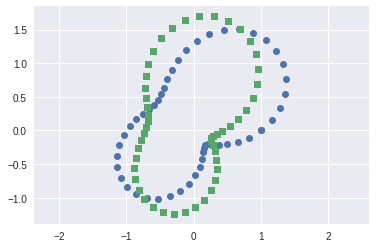

In [18]:
tplot(X, givens(0.5) @ X)

## Reflection

Using a construct of the form $I - \alpha v v^T$ to create a reflection across the plane defined by unit normal vector $n = [\cos\theta, \sin\theta]$.

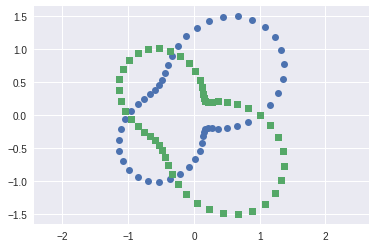

In [21]:
def reflect(theta):
    v = np.array([np.cos(theta), np.sin(theta)])
    I = np.eye(2) # 2x2 identity
    #v[:,None]*v.T
    # YOUR CODE HERE
    return I-2*np.outer(v,v)
    #return I-2*v[:,None]*v.T
    raise NotImplementedError()

tplot(X, reflect(np.pi/2) @ X)

In [15]:
assert np.allclose(np.linalg.norm(X, axis=0), np.linalg.norm(reflect(0.3) @ X, axis=0))
assert np.allclose(reflect(0.5) @ reflect(0.5) @ X, X)
print('Tests pass')

Tests pass
